In [42]:
import pandas as pd
import requests
import io
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, weibull_min




# Ex. 1)
- Baixe o arquivo de dados CSV ageatmar disponível no repositório de datasets do R. Importe os dados num objeto da classe tibble em R ou da classe DataFrame em Python. Valide os dados importados verificando as variáveis (colunas) e as observações (linhas) importadas. Utilize a função summarize() no R ou describe() no Python para obter uma visão geral e resumida dos dados importados. Verifique a distribuição dos dados com uso de um histograma e gráfico de dispersão. Examine o histograma gerado e identifique um padrão ou característica notável, como distribuição de dados e outliers.

In [43]:
path = "https://vincentarelbundock.github.io/Rdatasets/csv/openintro/age_at_mar.csv"

df_age = pd.read_csv(path, index_col=0)
display(df_age.head())


,age
rownames,
1,32
2,25
3,24
4,26
5,32


In [44]:
df_age.describe()

,age
count,5534.000000
mean,23.440188
std,4.721365
min,10.000000
25%,20.000000
50%,23.000000
75%,26.000000
max,43.000000


<Axes: >

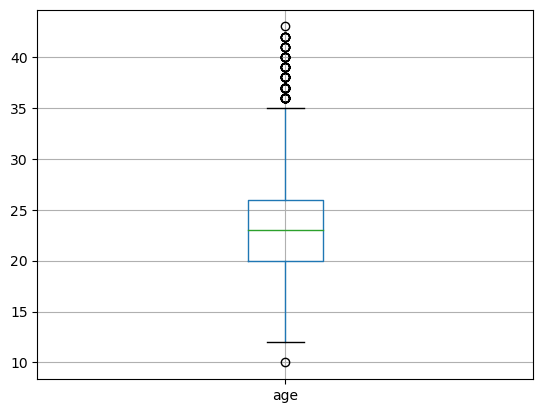

In [45]:
df_age.boxplot(column='age')

array([[<Axes: title={'center': 'age'}>]], dtype=object)

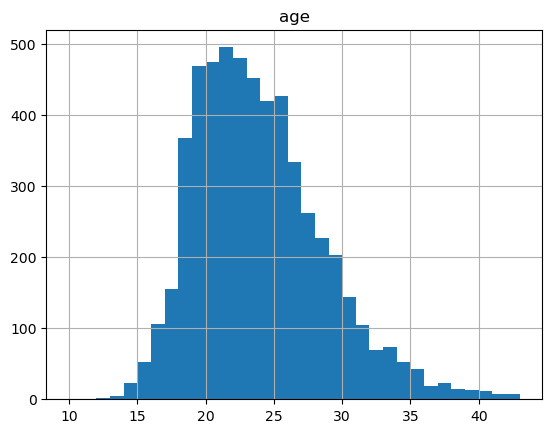

In [46]:
df_age.hist(column='age', bins=33, range=(10, 43))

- O histograma parece seguir a distribuição Log-Normal, que é caracterizada por uma curva assimétrica. No histograma, é possível notar uma maior densidade de dados "à esquerda" do gráfico. Para avaliar se esta distribuição se adequa aos dados, realizei abaixo o fit de uma curva Log-Normal no histograma.

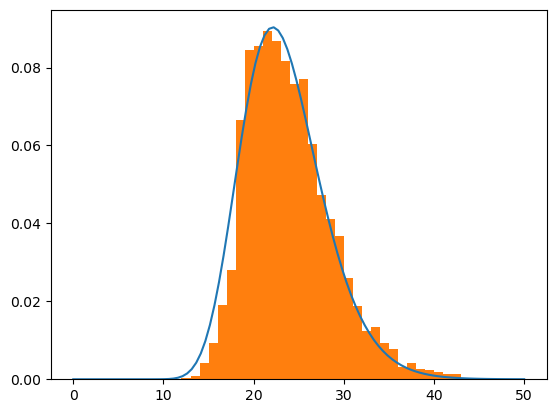

In [47]:

data = df_age['age']
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 50, 100)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf, label='lognorm')
plt.hist(data, bins=33, range=(10, 43), density=True)
plt.show()


- Conforme gráfico acima, pode-se notar que a distribuição Log-Normal se adequa muito bem ao padrão dos dados.

- Para avaliar os outliers, utilizei o método de Tukey para encontrar as faixas de valores a partir das quais que os dados são considerados outliers.

In [48]:
# Econtra os outliers segundo o método de Tukey
Q1 = df_age['age'].quantile(0.25)
Q3 = df_age['age'].quantile(0.75)
IQR = Q3 - Q1
print("Outliers abaixo de: {}".format(Q1 - 1.5 * IQR))
print("Outliers acima de: {}".format(Q3 + 1.5 * IQR))

# Printa o número de outliers acima e abaixo
print("Número de outliers abaixo: {}".format(df_age[df_age['age'] < Q1 - 1.5 * IQR].shape[0]))
print("Número de outliers acima: {}".format(df_age[df_age['age'] > Q3 + 1.5 * IQR].shape[0]))

Outliers abaixo de: 11.0
Outliers acima de: 35.0
Número de outliers abaixo: 1
Número de outliers acima: 95


- A partir do resultado acima, pode-se perceber uma assimetria muito grande em relação ao número outliers entre a faixa inferior e a superior. Enquanto a inferior possui apenas 1 outlier, a superior possui 95. Isso está condizente com a realidade, uma vez que em muitos lugares existe proibição de casamento envolvendo indivíduos menores de idade enquanto que não existe nenhuma limitação legal ou social para casasmentos de indivíduos mais velhos. 

---

# Ex. 2)

- Acesse o Portal de Dados Abertos do TSE. Selecione qualquer um arquivo CSV da categoria ”Resultados”. Baixe e descompacte o arquivo. Dentro do arquivo ZIP baixado, localize o arquivo leiame-x.pdf. Abra o leiame-x.pdf para identificar o encoding dos dados e os nomes das variáveis presentes no arquivo CSV. Importe os dados, usando essas informações, num objeto da classe tibble em R ou da classe DataFrame em Python. Valide os dados importados verificando as variáveis (colunas) e as observações (linhas) importadas. Utilize a função summarize() no R ou describe() no Python para obter uma visão geral e resumida dos dados importados (Fonte).

In [49]:
path = "https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/correspesp/CESP_2t_AC_291020221210.zip"
response = requests.get(path)

# Passa a resposta para um objeto do tipo BytesIO
zip_file = io.BytesIO(response.content)

# Extrai o conteúdo do arquivo zip
import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('./extracted')
    


O arquivo escolhido foi ccont_2t_AC-291020221210.csv. O arquivo leia-me correspondene é leiame-corresp-esperada-contingencia.pdf, segundo o qual o encoding do .csv é "Latin 1" e as variáveis presentes são:

- DT_GERACAO
- HH_GERACAO
- CD_PLEITO
- SG_UF
- CD_MUNICIPIO
- NM_MUNICIPIO
- NR_ZONA
- NR_URNA_ESPERADA
- CD_CARGA_URNA_ESPERADA
- CD_FLASHCARD_URNA_ESPERADA
- DT_CARGA_URNA_ESPERADA
- DT_CARGA_URNA_ESPERADA

In [50]:
path = "./extracted/ccont_2t_AC_291020221210.csv"
df_tse = pd.read_csv(path, sep=';', encoding='latin1')
display(df_tse.head())

,DT_GERACAO,HH_GERACAO,CD_PLEITO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_URNA_ESPERADA,CD_CARGA_URNA_ESPERADA,CD_FLASHCARD_URNA_ESPERADA,DT_CARGA_URNA_ESPERADA,ST_CORRESP_ALTERADA
0,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1101632,165404163437130713256575,1DD6178A,22/09/2022 13:26:00,*
1,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1101090,13989012547866195897669,15F7E34D,22/09/2022 13:33:00,*
2,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1102647,619949614482833439150880,1DD6178A,22/09/2022 14:28:00,*
3,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1015087,721060728818833878710264,15F7E34D,22/09/2022 14:09:00,*
4,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1106252,569444561377674188648658,1DD6178A,22/09/2022 14:09:00,*


In [51]:
df_tse.describe()

,CD_PLEITO,CD_MUNICIPIO,NR_ZONA,NR_URNA_ESPERADA
count,725.0,725.000000,725.000000,7.250000e+02
mean,407.0,1259.393103,4.834483,1.600724e+06
std,0.0,186.036617,2.902213,3.900661e+05
min,407.0,1007.000000,1.000000,1.004227e+06
25%,407.0,1074.000000,2.000000,1.225391e+06
50%,407.0,1392.000000,4.000000,1.662987e+06
75%,407.0,1392.000000,8.000000,2.045019e+06
max,407.0,1570.000000,9.000000,2.048290e+06


---

# Ex. 3)
- Faça os itens 1–5 da Seção 23.5 da referência [56].

## 1)

In [52]:
path = "https://web.archive.org/web/20181024132313/http://www.stevetheump.com/Payrolls.htm"
response = requests.get(path)
print(response.content)

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head><script type="text/javascript" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=2mqEsuX0" charset="utf-8"></script>\n<script type="text/javascript" src="https://web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" charset="utf-8"></script>\n<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>\n<script type="text/javascript" src="https://web-static.archive.org/_static/js/ruffle/ruffle.js"></script>\n<script type="text/javascript">\n    __wm.init("https://web.archive.org/web");\n  __wm.wombat("http://www.stevetheump.com/Payrolls.htm","20181024132313","https://web.archive.org/","web","https://web-static.archive.org/_static/",\n\t      "1540387393");\n</script>\n<link rel="stylesheet" type="text/css" href="https://web

## 2)

In [53]:
bs = BeautifulSoup(response.content, 'html.parser')
print(bs.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script charset="utf-8" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=2mqEsuX0" type="text/javascript">
  </script>
  <script charset="utf-8" src="https://web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript">
  </script>
  <script>
   window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};
  </script>
  <script src="https://web-static.archive.org/_static/js/ruffle/ruffle.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("http://www.stevetheump.com/Payrolls.htm","20181024132313","https://web.archive.org/","web","https://web-static.archive.org/_static/",
	      "1540387393");
  </script>
  <link href="https://web-static.archive.

## 3)

In [54]:
# Finds table in the html
table = bs.find_all('table')[8]
# Converte a tabela em um DataFrame
df = pd.read_html(str(table))[0]
df.head()

,Team,Payroll,Average
0,N.Y. Yankees,"$201,689,030","$6,722,968"
1,Philadelphia,172976381,5765879
2,Boston,161407476,5978055
3,Los Angeles Angels,138998524,4483823
4,Chicago White Sox,129285539,4788353


## 4)

In [55]:
# Printa as primeiras 4 tabelas do site
for i in range(4):
    table = bs.find_all('table')[i + 1]
    df = pd.read_html(str(table))[0]
    display(df.head())

,RANK,TEAM,Payroll
0,1,Boston Red Sox,$235.65M
1,2,San Francisco Giants,$208.51M
2,3,Los Angeles Dodgers,$186.14M
3,4,Chicago Cubs,$183.46M
4,5,Washington Nationals,$181.59M


,0,1,2,3,4
0,Rank,Team,25 Man,Disabled List,Total Payroll
1,1,Los Angeles Dodgers,"$155,887,854","$37,354,166","$242,065,828"
2,2,New York Yankees,"$168,045,699","$5,644,000","$201,539,699"
3,3,Boston Red Sox,"$136,780,500","$38,239,250","$199,805,178"
4,4,Detroit Tigers,"$168,500,600","$11,750,000","$199,750,600"


,Rank,Team,Opening Day,Avg Salary,Median
0,1,Dodgers,"$ 223,352,402","$ 7,445,080","$ 5,166,666"
1,2,Yankees,"$ 213,472,857","$ 7,361,133","$ 3,300,000"
2,3,Red Sox,"$ 182,161,414","$ 6,072,047","$ 3,500,000"
3,4,Tigers,"$ 172,282,250","$ 6,891,290","$ 3,000,000"
4,5,Giants,"$ 166,495,942","$ 5,946,284","$ 4,000,000"


,0,1
0,Team,2015 Payroll
1,1. Los Angeles Dodgers,"$272,789,040"
2,2. New York Yankees,"$219,282,196"
3,3. Boston Red Sox,"$187,407,202"
4,4. Detroit Tigers,"$173,813,750"


**RESPOSTA**
- As quatro tabelas são referentes a dados de *payroll*. Apenas a terceira não possui a palavra "*payroll*" explícita, mas se refere a dados de salário. Deste modo, a alternativa correta é a **(A)**.

## 5)

In [56]:
# Printa as últimas 3 tabelas do site
for i in range(3):
    table = bs.find_all('table')[-i -1]
    df = pd.read_html(str(table))[0]
    display(df.head())

,0,1,2,3
0,Year,Minimum,Average,% Chg
1,2019,"$555,000",NaN,-
2,2018,"$545,000","$4,520,000",NaN
3,2017,"$535,000","$4,470,000",5.4
4,2016,"$507,500","$4,400,000",-


,0,1,2
0,Team,Payroll,Average
1,NY Yankees,"$92,538,260","$3,190,974"
2,Los Angeles,"$88,124,286","$3,263,862"
3,Atlanta,"$84,537,836","$2,817,928"
4,Baltimore,"$81,447,435","$2,808,532"


,0,1,2
0,Team,Payroll,Average
1,NY Yankees,"$109,791,893","$3,541,674"
2,Boston,"$109,558,908","$3,423,716"
3,Los Angeles,"$108,980,952","$3,757,964"
4,NY Mets,"$93,174,428","$3,327,658"


**RESPOSTA**
- A última tabela da página é a primeira mostrada acima, mostra uma média dentre todos os times por ano. A alternativa correta é **(A)**